# Tutorial 5 - Particle Morphologies

It is sometimes useful to use surface energies in order to generate particle morphologies. This tutorial demonstrates how to obtain surface energies for surfaces containing adsorbed species using surfinpy and how to use these surface energies to generate a wulff construction using pymatgen(1)



(1) https://www.sciencedirect.com/science/article/pii/S0927025612006295?via%3Dihub

In [1]:
import sys
sys.path.append('../surfinpy/')

import numpy as np
import p_vs_t as pt
import wulff  
from pymatgen.core.surface import SlabGenerator, generate_all_slabs, Structure, Lattice
from pymatgen.analysis.wulff import WulffShape

In [2]:
adsorbant = -21.55846785
SE = 1.44
stoich = {'M': 24, 'X': 48, 'Y': 0, 'Area':60.22, 'Energy': -574.66, 'Label': 'Stoich'}
Adsorbant_1 = {'M': 24, 'X': 48, 'Y': 2, 'Area': 60.22, 'Energy': -625.87,  'Label': '1 Species'}
Adsorbant_2 = {'M': 24, 'X': 48, 'Y': 4, 'Area': 60.22, 'Energy': -671.22, 'Label': '2 Species'}

data = [Adsorbant_1, Adsorbant_2]
thermochem = np.genfromtxt('Free_energy.txt', dtype=float)

Surface_100 = wulff.calculate_surface_energy(stoich, data, SE, adsorbant, thermochem, 298, 0)

In [3]:
adsorbant = -21.55846785
SE = 1.06

stoich = {'M': 24, 'X': 48, 'Y': 0, 'Area': 85.12, 'Energy': -670.95, 'Label': 'Stoich'}
Adsorbant_1 = {'M': 24, 'X': 48, 'Y': 2, 'Area': 85.12, 'Energy': -715.62,  'Label': '1 Species'}
Adsorbant_2 = {'M': 24, 'X': 48, 'Y': 4, 'Area':85.12, 'Energy': -765.80, 'Label': '2 Species'}

data = [Adsorbant_1, Adsorbant_2]
thermochem = np.genfromtxt('Free_energy.txt', dtype=float)
Surface_110 = wulff.calculate_surface_energy(stoich, data, SE, adsorbant, thermochem, 298, 0)

In [4]:
adsorbant = -21.55846785
SE = 0.76
stoich = {'M': 24, 'X': 48, 'Y': 0, 'Area': 77.14, 'Energy': -580.610371, 'Label': '0.00 - $Ce^{4+}$'}
Adsorbant_1 = {'M': 24, 'X': 48, 'Y': 2, 'Area': 77.14, 'Energy': -625.24728,  'Label': '1.66 - $Ce^{4+}$'}
Adsorbant_2 = {'M': 24, 'X': 48, 'Y': 4, 'Area': 77.14, 'Energy': -671.77988, 'Label': '3.32 - $Ce^{4+}$'}

data = [Adsorbant_1, Adsorbant_2]
thermochem = np.genfromtxt('Free_energy.txt', dtype=float)

Surface_111 = wulff.calculate_surface_energy(stoich, data, SE, adsorbant, thermochem, 298, 0)

In [5]:
print(Surface_100)
print(Surface_110)
print(Surface_111)

[1.44       0.53879961 0.41713447]
[1.06       1.03792184 0.49728384]
[0.76       0.73907434 0.52128445]


shape factor: 5.719, anisotropy: 0.000, weighted surface energy: 0.760 J/m^2


C:\Users\adam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


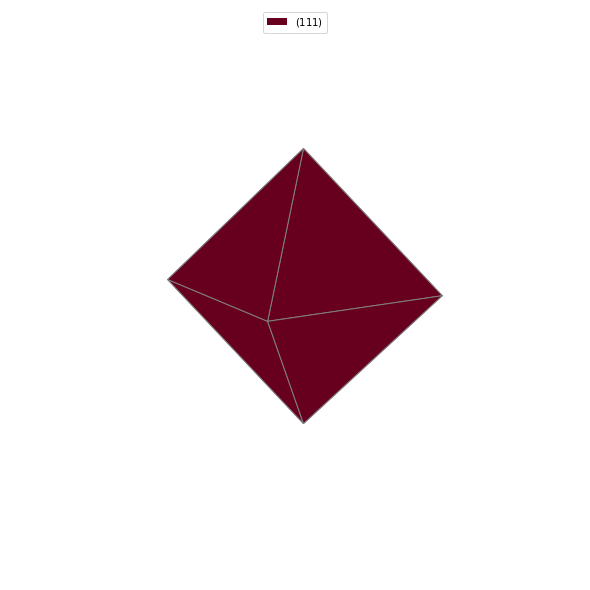

In [6]:
lattice = Lattice.cubic(5.411)
ceo = Structure(lattice,["Ce", "O"],
               [[0,0,0], [0.25,0.25,0.25]])
surface_energies_ceo = {(1,1,1): Surface_111[0], (1,1,0): Surface_110[0], (1,0,0): Surface_100[0]}

miller_list = surface_energies_ceo.keys()
e_surf_list = surface_energies_ceo.values()

# We can now construct a Wulff shape with an accuracy up to a max Miller index of 3
wulffshape = WulffShape(ceo.lattice, miller_list, e_surf_list)

# Let's get some useful information from our wulffshape object
print("shape factor: %.3f, anisotropy: \
%.3f, weighted surface energy: %.3f J/m^2" %(wulffshape.shape_factor, 
                                       wulffshape.anisotropy,
                                       wulffshape.weighted_surface_energy))


# If we want to see what our Wulff shape looks like
wulffshape.show(custom_colors={(1, 1, 1): [0.40392156862745099, 0.0, 0.12156862745098039, 1.0]}, direction=(1.00, 0.25, 0.25))

shape factor: 5.660, anisotropy: 0.117, weighted surface energy: 0.563 J/m^2


C:\Users\adam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


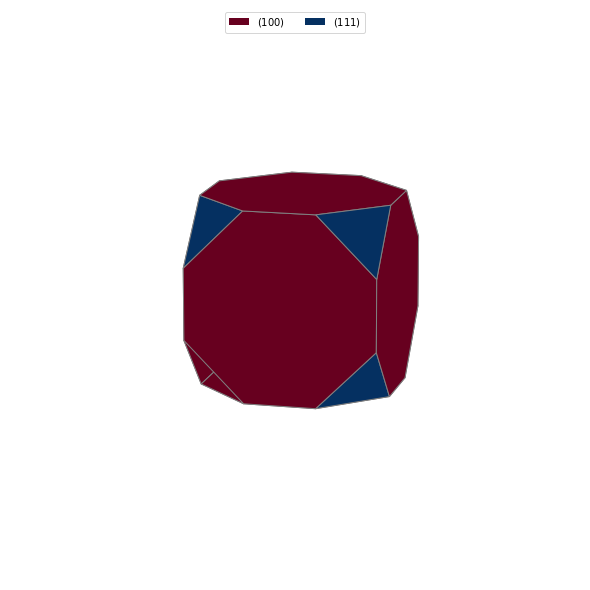

In [7]:
lattice = Lattice.cubic(5.411)
ceo = Structure(lattice,["Ce", "O"],
               [[0,0,0], [0.25,0.25,0.25]])
surface_energies_ceo = {(1,1,1): Surface_111[1], (1,1,0): Surface_110[1], (1,0,0): Surface_100[1]}

miller_list = surface_energies_ceo.keys()
e_surf_list = surface_energies_ceo.values()

# We can now construct a Wulff shape with an accuracy up to a max Miller index of 3
wulffshape = WulffShape(ceo.lattice, miller_list, e_surf_list)

# Let's get some useful information from our wulffshape object
print("shape factor: %.3f, anisotropy: \
%.3f, weighted surface energy: %.3f J/m^2" %(wulffshape.shape_factor, 
                                       wulffshape.anisotropy,
                                       wulffshape.weighted_surface_energy))


# If we want to see what our Wulff shape looks like
wulffshape.show(color_set="RdBu", direction=(1.00, 0.25, 0.25))


shape factor: 5.210, anisotropy: 0.098, weighted surface energy: 0.455 J/m^2


C:\Users\adam\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


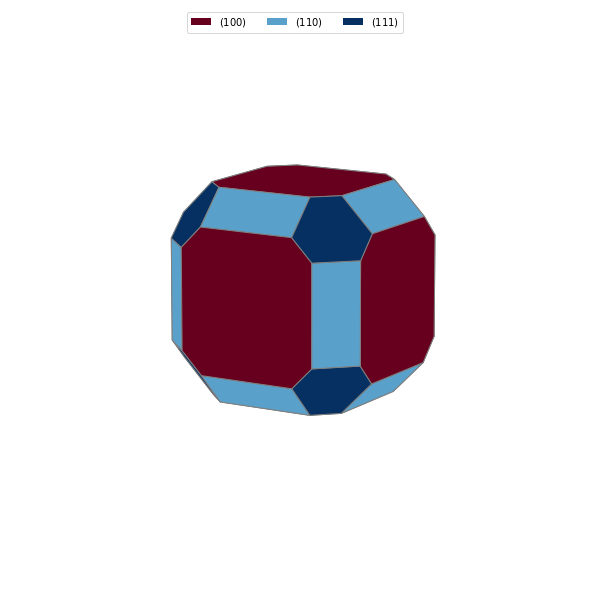

In [8]:
lattice = Lattice.cubic(5.411)
ceo = Structure(lattice,["Ce", "O"],
               [[0,0,0], [0.25,0.25,0.25]])
surface_energies_ceo = {(1,1,1): Surface_111[2], (1,1,0): Surface_110[2], (1,0,0): Surface_100[2]}

miller_list = surface_energies_ceo.keys()
e_surf_list = surface_energies_ceo.values()

# We can now construct a Wulff shape with an accuracy up to a max Miller index of 3
wulffshape = WulffShape(ceo.lattice, miller_list, e_surf_list)

# Let's get some useful information from our wulffshape object
print("shape factor: %.3f, anisotropy: \
%.3f, weighted surface energy: %.3f J/m^2" %(wulffshape.shape_factor, 
                                       wulffshape.anisotropy,
                                       wulffshape.weighted_surface_energy))


# If we want to see what our Wulff shape looks like
wulffshape.show(color_set="RdBu", direction=(1.00, 0.60, 0.25))